In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv(r"C:\Users\ASUS\Desktop\PythonProjects\8_important_projects\Marketing Campaign Analysis\Data set\KAG_conversion_data.csv")

In [3]:
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [5]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [6]:
df.shape

(1143, 11)

In [7]:
df.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [8]:
df['age'].value_counts()

age
30-34    426
45-49    259
35-39    248
40-44    210
Name: count, dtype: int64

In [9]:
df.columns

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion'],
      dtype='object')

In [10]:
# Encode 'age' and 'gender' as categorical variables
le_age=LabelEncoder()
le_gender=LabelEncoder()

In [11]:
df['age']=le_age.fit_transform(df['age'])
df['gender']=le_age.fit_transform(df['gender'])

In [12]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,0,1,15,7350,1,1.43,2,1
1,708749,916,103917,0,1,16,17861,2,1.82,2,0
2,708771,916,103920,0,1,20,693,0,0.00,1,0
3,708815,916,103928,0,1,28,4259,1,1.25,1,0
4,708818,916,103928,0,1,28,4133,1,1.29,1,1


In [13]:
df.tail()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
1138,1314410,1178,179977,3,0,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,3,0,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,3,0,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,3,0,113,790253,135,198.710001,8,2
1142,1314415,1178,179982,3,0,114,513161,114,165.609999,5,2


In [14]:
df.columns

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion'],
      dtype='object')

In [15]:
# Normalize Numerical Features
scale_feature= ['interest','Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion']

In [16]:
scaler = StandardScaler()
df[scale_feature]= scaler.fit_transform(df[scale_feature])

In [17]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,0,1,-0.659472,-0.573793,-0.569573,-0.574772,-0.190922,0.032236
1,708749,916,103917,0,1,-0.622353,-0.540171,-0.551988,-0.570282,-0.190922,-0.543486
2,708771,916,103920,0,1,-0.473877,-0.595087,-0.587157,-0.591233,-0.414055,-0.543486
3,708815,916,103928,0,1,-0.176924,-0.583680,-0.569573,-0.576844,-0.414055,-0.543486
4,708818,916,103928,0,1,-0.176924,-0.584083,-0.569573,-0.576383,-0.414055,0.032236


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   int32  
 4   gender               1143 non-null   int32  
 5   interest             1143 non-null   float64
 6   Impressions          1143 non-null   float64
 7   Clicks               1143 non-null   float64
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   float64
 10  Approved_Conversion  1143 non-null   float64
dtypes: float64(6), int32(2), int64(3)
memory usage: 89.4 KB


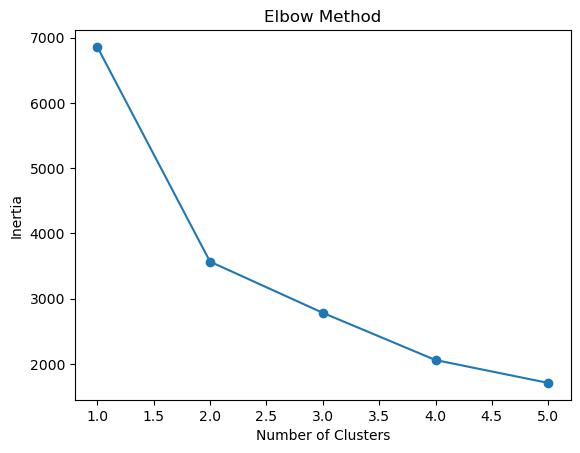

In [19]:
# Elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[scale_feature])
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(range(1, 6), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [20]:
kmeans= KMeans(n_clusters=3,random_state=42)
df['Cluster'] = kmeans.fit_predict(df[scale_feature])


In [21]:
df.columns

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion', 'Cluster'],
      dtype='object')

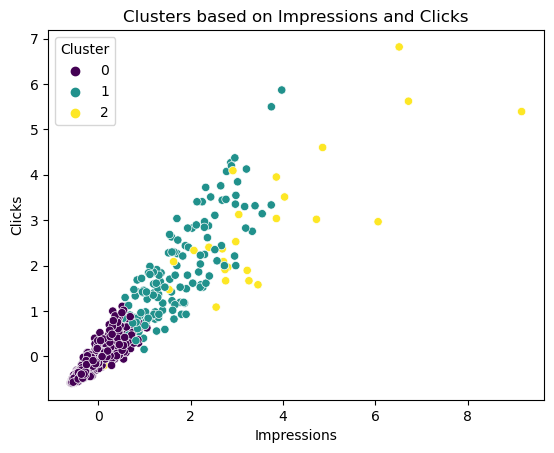

In [22]:
# Example: Plot Impressions vs Clicks colored by Cluster
sns.scatterplot(x='Impressions', y='Clicks', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters based on Impressions and Clicks')
plt.show()


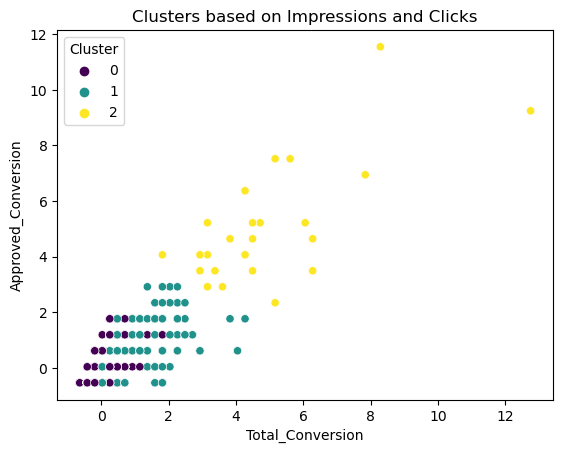

In [23]:
# Example: Plot Impressions vs Clicks colored by Cluster
sns.scatterplot(x='Total_Conversion', y='Approved_Conversion', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters based on Impressions and Clicks')
plt.show()


In [25]:
# Analyze cluster characteristics
cluster_analysis = df.groupby('Cluster').mean()
print(cluster_analysis)


                ad_id  xyz_campaign_id  fb_campaign_id       age    gender  \
Cluster                                                                      
0        9.590126e+05      1049.214724   130861.346626  1.210634  0.544990   
1        1.155370e+06      1174.517986   151308.690647  1.719424  0.302158   
2        1.151106e+06      1178.000000   150030.576923  0.846154  0.653846   

         interest  Impressions    Clicks     Spent  Total_Conversion  \
Cluster                                                                
0       -0.048374    -0.338500 -0.342086 -0.342408         -0.268722   
1        0.328856     1.714966  1.882168  1.838826          0.987349   
2        0.061494     3.564322  2.805341  3.049146          4.829571   

         Approved_Conversion  
Cluster                       
0                  -0.226780  
1                   0.665945  
2                   4.970165  
